In [87]:
# PCA 

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [90]:
df.shape

(32561, 15)

Veri kümesinde 32561 örnek ve 15 feature/nitelik olduğunu görebiliriz.

In [91]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Veri kümesinin özeti, eksik değer olmadığını göstermektedir. 

Ancak veriye göz attığımızda, veri kümesinin "?" olarak kodlanmış değerler içerdiğini gösteriyor. 

Yani, kodlayacağım "?" NaN değerleri olarak.

In [93]:
# Encode ?

df[df == "?"] = np.nan

df            

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Şimdi, değişkenlerden workclass, occupation ve native.country eksik değerler içerdiğini gösteriyor. 

Bu değişkenlerin tümü kategorik veri türüdür. Bu yüzden, eksik değerleri en sık değer yani mode() ile atayalım.

In [95]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [96]:
missing_col = ["workclass", "occupation", "native.country"]

In [97]:
for col in missing_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/w1/s_04487n3sl1mys9v82ddct40000gn/T/ipykernel_52269/538672514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [98]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Veri setinde NAN değerleri doldurmuş olduk. 

In [99]:
X = df.drop("income", axis=1)
y = df["income"]

In [100]:
categoric = X.select_dtypes("object")
categoric

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [101]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [102]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [103]:
# Veri setini ayıralım..

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
# Encode kategorik değişkenler

from sklearn import preprocessing

for feature in categoric:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.fit_transform(X_test[feature])
    

In [105]:
# Feature Scaling/Ölçekleme

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [106]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)

In [107]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.429109,-0.090519,0.961944,0.183680,-0.420040,-0.399781,-1.037229,-0.898708,0.394740,0.703666,-0.146469,-0.217215,-0.046384,0.260611
1,1.723529,-0.090519,-0.761973,1.215014,-0.032023,1.592598,1.221516,1.585101,0.394740,-1.421129,-0.146469,3.782536,-0.611341,0.260611
2,-0.411015,-0.090519,-0.499149,-0.331987,1.132030,-0.399781,-0.033342,-0.898708,-0.779485,0.703666,-0.146469,-0.217215,-0.046384,-4.975619
3,-1.073459,-0.090519,-0.682968,-0.847654,0.744013,0.928472,1.221516,0.964149,0.394740,0.703666,-0.146469,-0.217215,-1.660545,0.260611
4,2.091553,1.708176,2.301181,0.183680,-0.420040,-0.399781,-1.539173,2.206053,0.394740,-1.421129,-0.146469,-0.217215,-3.113290,0.260611


In [108]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8275156106049749


Çıkan bu sonuç değeri tüm özelliklerle ortaya çıkan doğruluk değeridir.


## Logistic Regresyon ve PCA

In [109]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit_transform(X_train)

array([[-1.24964564, -0.73255272,  0.59415256, ...,  0.53473641,
        -0.28314896,  0.11379802],
       [ 1.05766103,  1.77144446,  0.75396569, ...,  1.15262435,
        -1.63846688,  0.59371722],
       [-0.52776995, -1.11753575, -1.09024302, ..., -0.51436254,
         1.32478798, -0.17604217],
       ...,
       [-1.53372017, -0.19271618, -0.35309539, ..., -0.37758801,
        -1.20410403,  0.02291744],
       [-1.39787499,  0.44595484,  0.39310738, ...,  0.00852776,
        -0.55629674, -0.10776162],
       [ 0.71710027, -0.23146818, -1.02266701, ...,  0.03819211,
        -0.47062249,  0.92193076]])

In [110]:
pca.explained_variance_ratio_

array([0.14697928, 0.10178465, 0.08047181, 0.07892163, 0.07448014,
       0.07316999, 0.07077443, 0.0676231 , 0.06473687, 0.0614298 ,
       0.06084744, 0.04879688, 0.04257351, 0.02741048])

In [111]:
pca.explained_variance_ratio_.sum()

np.float64(0.9999999999999998)

In [112]:
# ilk 13 feature ile LR

X = df.drop(["income", "native.country"], axis=1)
y = df["income"]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [115]:
categorical = X.select_dtypes("object")
categoric.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [116]:
categorical = categorical.drop("native.country", axis=1)

KeyError: "['native.country'] not found in axis"

In [117]:
categorical.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')

In [118]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
32098,40,State-gov,31627,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20
25206,39,Local-gov,236391,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38
23491,42,Private,194710,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40
7054,38,Federal-gov,99527,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,90,Self-emp-not-inc,282095,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40
19648,36,Private,279721,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40
9845,26,Private,51961,12th,8,Never-married,Sales,Other-relative,Black,Male,0,0,51
10799,44,Private,115323,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40


In [119]:
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.fit_transform(X_test[feature])

In [120]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
32098,40,6,31627,9,13,2,3,5,4,0,0,0,20
25206,39,1,236391,11,9,2,6,0,4,1,0,0,38
23491,42,3,194710,15,10,4,3,1,4,0,0,0,40
12367,27,1,273929,11,9,4,4,3,4,1,0,0,40
7054,38,0,99527,12,14,2,3,0,4,1,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,90,5,282095,15,10,2,4,0,4,1,0,0,40
19648,36,3,279721,11,9,2,13,0,4,1,0,0,40
9845,26,3,51961,2,8,4,11,2,2,1,0,0,51
10799,44,3,115323,12,14,2,3,0,4,1,0,0,40


In [121]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [122]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.392980,-1.430470,-0.145189,-0.217407,-1.662414
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.200753
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.392980,-1.430470,-0.145189,-0.217407,-0.038346
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.392980,0.699071,-0.145189,-0.217407,-0.038346
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,3.763293,1.703439,0.870243,1.217715,-0.034095,-0.402341,-0.530388,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346
22788,-0.191461,-0.090641,0.847831,0.184396,-0.423425,-0.402341,1.736225,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346
22789,-0.923823,-0.090641,-1.302317,-2.140570,-0.812755,0.926666,1.232533,0.346032,-1.963453,0.699071,-0.145189,-0.217407,0.854891
22790,0.394429,-0.090641,-0.704154,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346


In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8213


- Son özelliği kaldırdıktan sonra doğruluğun 0.8218'den 0.8213'e düşürüldüğünü görebiliriz.


- Şimdi, son iki özelliği bir araya alırsam, o zaman varyansın yaklaşık %7'sinin onlar tarafından açıklandığını görebiliriz.


- Son iki özelliği drop'layarak doğruluk değerini hesaplayalım.

In [124]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.8227


- Artık model 12 özellik ile eğitilmişse doğruluğun 0.8227'ye yükseltildiği görülebilir.


- Son olarak, son üç özelliği bir arada alacağım. Varyansın yaklaşık %11,83'ü onlar tarafından açıklanmaktadır.


- İşlemi tekrarlayacağım, bu özellikleri bırakacağım, modeli tekrar eğiteceğim ve doğruluğu hesaplayacağım.

In [125]:
X = df.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 11 features: 0.8186


- Son üç özelliği bırakırsam, doğruluğun önemli ölçüde 0.8187'ye düştüğünü görebiliriz.


- Amacımız doğruluğu/accuracy'i en üst düzeye çıkarmaktır. İlk 12 özellik ile maksimum doğruluk elde ediyoruz ve doğruluk 0.8227.

Boyut sayısı az ise yukarıdaki işlem iyi çalışır.

Ancak, çok sayıda boyutumuz varsa oldukça hantal.

Bu durumda, daha iyi bir yaklaşım, varyansın önemli ölçüde büyük bir kısmını açıklayabilecek boyut sayısını hesaplamaktır.

Aşağıdaki kod, boyutsallığı azaltmadan PCA'yı hesaplar, ardından eğitim seti varyansının %90'ını korumak için gereken minimum boyut sayısını hesaplar.

In [126]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


Gerekli boyut sayısı bulunduğunda, boyut sayısını "dim" olarak ayarlayabilir ve PCA'yı tekrar çalıştırabiliriz.

Boyut sayısı "dim" olarak ayarlandığında, gerekli doğruluğu hesaplayabiliriz.

TypeError: _AxesBase.set_xlim() takes from 1 to 3 positional arguments but 4 were given

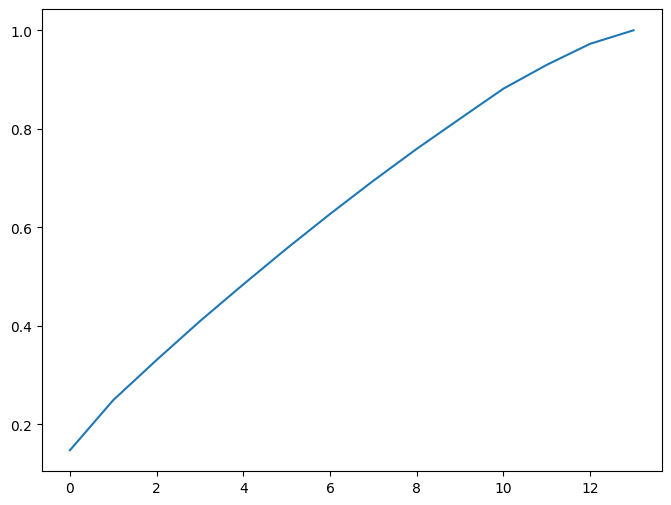

In [130]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()